# 🔸 Project description

📌This project aims to gain some insight into the data for further modeling to investigate the profitability of the movies. Our job is to predict whether based on some features a movie is profitable or not. Obviously, we need to gain insight into our data, so before modeling it is necessary to do a comprehensive Exploratory Data Analysis (EDA), and then based on our knowledge dive into the modeling phase.

📌In phase two, after the modeling, we will be asked to design a simple recommendation system. We need to research different recommendation system schemes (e.g. Collaborative filtering, content-based filtering) and then design a simple recommender system. Our path toward this project is described as follows:

1. Data loading and gain info
2. Data cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Data Modeling (Using different ML models)
5. Evaluation
6. Recommender System

# 🔸 Dataset description

# 🔸 Step 1: Import Libraries

In [1]:
#pip install missingno

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import json
from wordcloud import WordCloud
from scipy.stats import chi2_contingency

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)
from xgboost import XGBClassifier

In [3]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)

# 🔸 Step 2: Read Dataset

In [4]:
# Define the data
data_m = './tmdb_5000_movies.csv'
data_c = './tmdb_5000_credits.csv'

df_m = pd.read_csv(data_m)
df_c = pd.read_csv(data_c)

In [5]:
# merge credits dataset to movies dataset using the 'id' column in both ones.
df_c.columns = ['id','tittle','cast','crew']
df_m = df_m.merge(df_c,on='id')

In [6]:
df_m.sample(5)

This data frame has 4803 rows and 23 columns


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
3480,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,8545,"[{""id"": 970, ""name"": ""parents kids relationshi...",en,Little Voice,"After the death of her father, Little Voice or...",4.647547,"[{""name"": ""Miramax Films"", ""id"": 14}]",...,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Finding your own voice can be magic.,Little Voice,6.6,61,Little Voice,"[{""cast_id"": 4, ""character"": ""Mari Hoff"", ""cre...","[{""credit_id"": ""56e7eae19251410a3a000b5f"", ""de..."
3979,3000000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.magpictures.com/freakonomics/,43942,"[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",en,Freakonomics,Some of the world's most innovative documentar...,1.781462,"[{""name"": ""Chad Troutwine Films"", ""id"": 7367},...",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Things you always thought you knew but didn't,Freakonomics,6.6,36,Freakonomics,"[{""cast_id"": 27, ""character"": ""Blake"", ""credit...","[{""credit_id"": ""52fe466cc3a36847f80fe50f"", ""de..."
911,50000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",http://www.22jumpstreetmovie.com,187017,"[{""id"": 6270, ""name"": ""high school""}, {""id"": 1...",en,22 Jump Street,After making their way through high school (tw...,52.380982,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're not 21 anymore,22 Jump Street,7.0,3319,22 Jump Street,"[{""cast_id"": 6, ""character"": ""Schmidt"", ""credi...","[{""credit_id"": ""5635fa64925141284c01a325"", ""de..."
453,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,12096,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 5340, ...",en,The Pink Panther,When the coach of the France soccer team is ki...,25.450534,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pardon His French.,The Pink Panther,5.6,550,The Pink Panther,"[{""cast_id"": 11, ""character"": ""Inspector Jacqu...","[{""credit_id"": ""5628186ac3a368487d00002a"", ""de..."
3860,3400000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...",NaN,12535,"[{""id"": 2456, ""name"": ""industrialist""}, {""id"":...",en,High Anxiety,Dr. Richard Thorndyke arrives as new administr...,5.690619,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Master of Comedy takes on The Master of Su...,High Anxiety,6.5,84,High Anxiety,"[{""cast_id"": 1, ""character"": ""Dr. Richard H. T...","[{""credit_id"": ""52fe44f69251416c75046f09"", ""de..."


# 🔸 Step 3: Dataset Overview

## Step 3.1: Overview

In [ ]:
print('This data frame has',df_m.shape[0],'rows and',df_m.shape[1], 'columns')

In [8]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Step 3.2: Summary Statistics for Numerical Variables

In [9]:
numerical_columns = df_m.select_dtypes(include=['int64', 'float64']).columns
df_m[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


## Step 3.3: Summary Statistics for Categorical Variables

In [10]:
catgorical_columns = df_m.select_dtypes(include='object').columns
df_m[catgorical_columns].describe().T

,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4803,4222,[],412
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
release_date,4802,3280,2006-01-01,10
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171


# 🔸 Step 4: Data Cleaning

📌 First, we make a copy of the data frame so that the original data frame does not undergo unwanted changes. Then, according to the descriptions of numerical and class columns, we clean the data.

📌 In the next step, we delete duplicate columns or columns that do not have a special role in our analysis.

📌 In the numerical columns, wherever we had 0, we put NaN instead.

📌 In the categorical columns, wherever we have [], we have put NaN instead.

📌 In the following, we have explained how to fill NaN values.

In [11]:
df = df_m.copy()

In [12]:
# Just 8 movies has different labels
flag = df['status'].values != 'Released'
df['status'][flag]

2906    Post Production
4169    Post Production
4178    Post Production
4401            Rumored
4453            Rumored
4508            Rumored
4662            Rumored
4754            Rumored
Name: status, dtype: object

In [13]:
columns_to_delete = ['homepage', 'overview', 'runtime', 'status','tagline','title','tittle']
df.drop(columns_to_delete, axis = 1, inplace = True)

In [14]:
#df

## Step 4.1: Missing Data

In [15]:
numerical_columns = ['budget', 'id', 'popularity', 'revenue', 'vote_average','vote_count']
for i in numerical_columns:
    if 0 in df[i].values:
        df[i] = df[i].replace(0, pd.NA)

budget                  1037
genres                    28
id                         0
keywords                 412
original_language          0
original_title             0
popularity                 1
production_companies     351
production_countries     174
release_date               1
revenue                 1427
spoken_languages          86
vote_average              63
vote_count                62
cast                      43
crew                      28
dtype: int64


<AxesSubplot:>

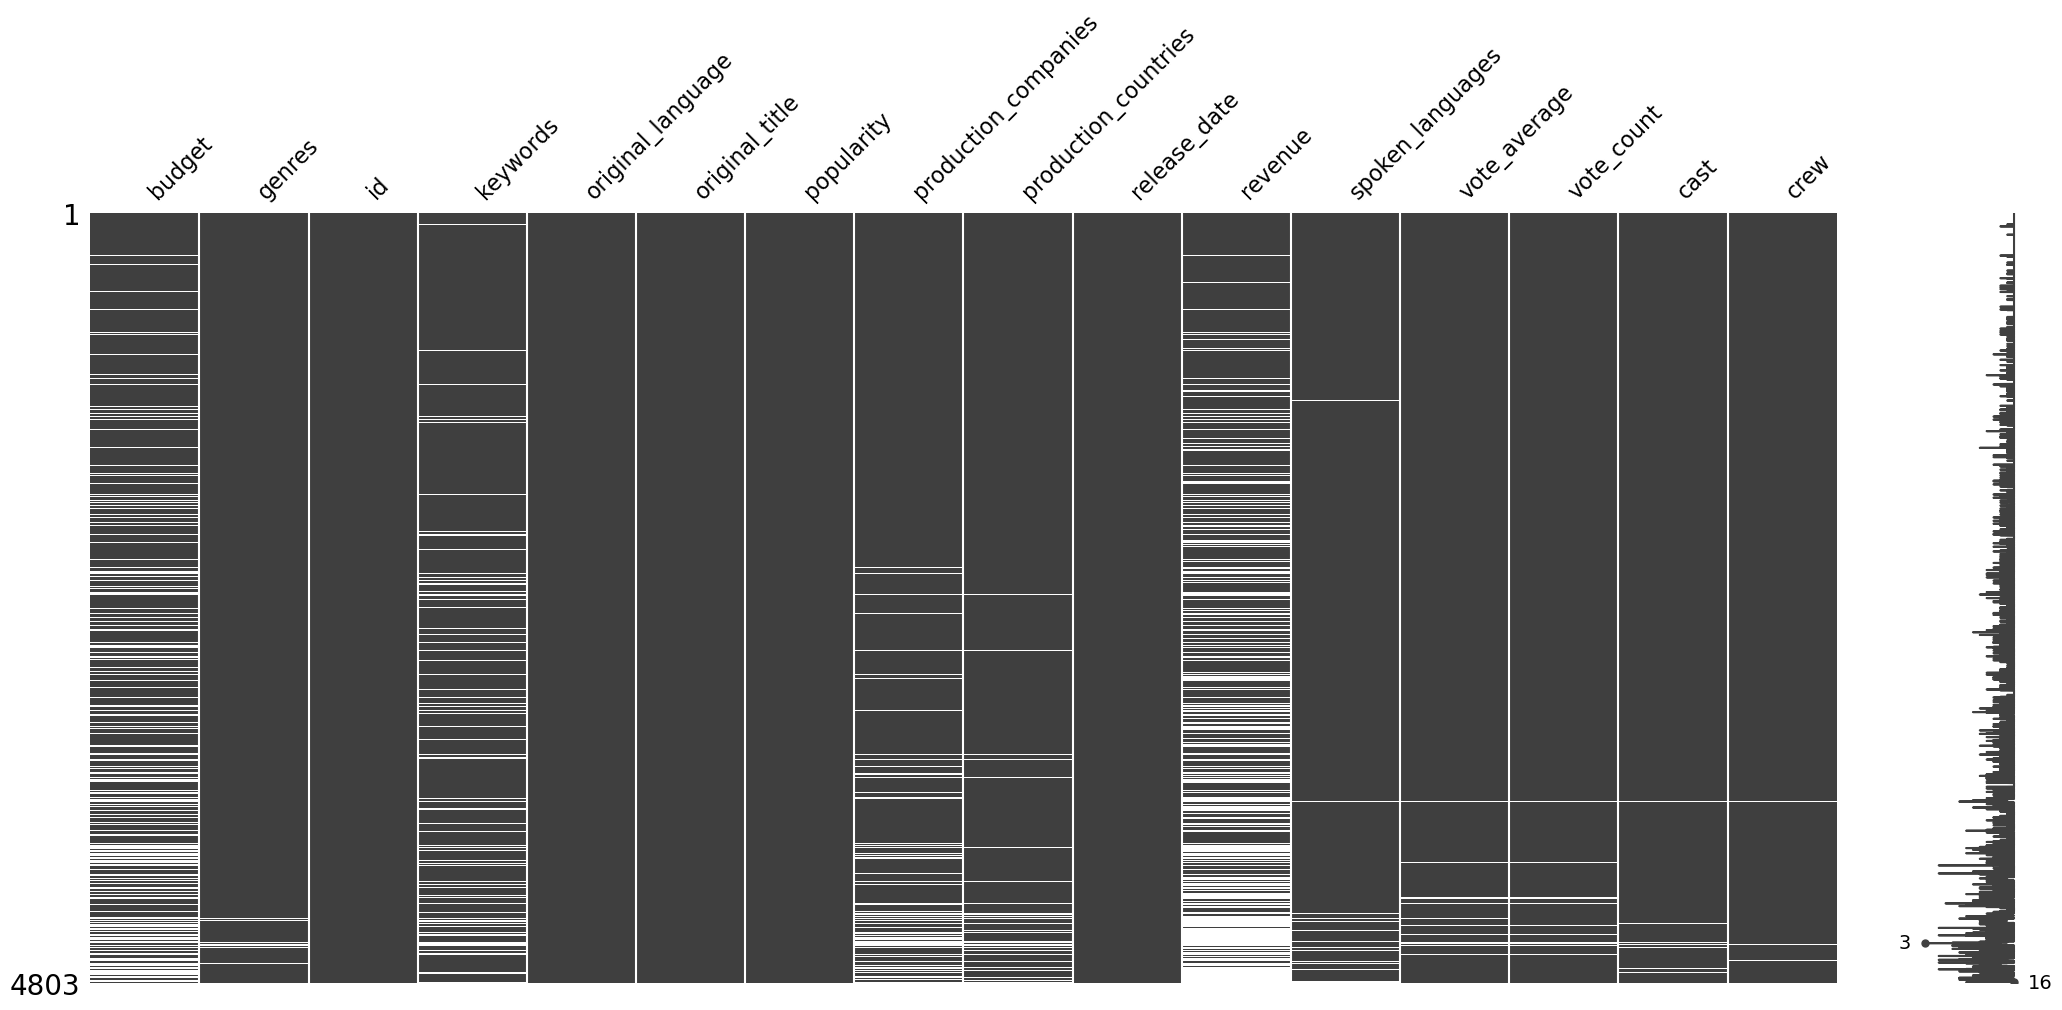

In [16]:
catgorical_columns = ['genres', 'keywords', 'original_language', 'original_title',
       'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'cast', 'crew']
for i in catgorical_columns:
    if '[]' in df[i].values:
        df[i] = df[i].replace('[]', pd.NA)  # Replace [] with missing values (NA)

print(df.isna().sum())
msno.matrix(df)

### Note that:

📌 In categorical columns, if the number of NaNs was high, they were filled with "mode", and if the number of NaNs was less than 40, they were "dropped" from the dataset.

📌 Also, in numerical columns, NaNs are filled with the "mean" value of each column.

In [17]:
replace_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
for column in replace_columns:
    df[column].fillna(df[column].mode()[0], inplace = True)
#print(df.isna().sum())

In [18]:
df.dropna(subset=['release_date'], inplace=True)
df.dropna(subset=['cast'], inplace=True)
df.dropna(subset=['crew'], inplace=True)
df.dropna(subset=['popularity'], inplace=True)

df['budget'].fillna(round(df['budget'].mean()), inplace = True)
df['revenue'].fillna(round(df['revenue'].mean()), inplace = True)
df['vote_average'].fillna(round(df['vote_average'].mean() , 1), inplace = True)
df['vote_count'].fillna(round(df['vote_count'].mean()), inplace = True)

print(df.isna().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
spoken_languages        0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64


# 🔸 Step 5: Preprocessing

📌 For ease of use, we will convert the JSON format columns into lists.

In [19]:
#df = df.reindex(range(df.shape[0]), method='backfill')

In [20]:
def convert_json_to_list(df, columns):
    for column in columns:
        df[column] = df[column].apply(json.loads)
    return df

df = convert_json_to_list(
    df,
    ["genres", "keywords", "production_companies", "spoken_languages", "cast", "crew"],
)

# 🔸 Step 6: Exploratory Data Analysis (EDA)

## Step 6.1: Single varaible analysis

### Step 6.1.1: Categorical varaible analysis

In [25]:
def Distribution_plot(name):
    # Concatenate, apply json.loads, and create DataFrame
    df_name = f"df_{name}"
    df_name = pd.DataFrame(json.loads('[' + ','.join(df[name]) + ']'))
    df_name = df_name.stack()
    df_name = pd.json_normalize(df_name)
    
    # Count the frequency of each id
    id_counts = df_name['name'].value_counts().nlargest(20)  # Count and select the top 20 most frequent ids

    ax = sns.barplot(df_name, x=id_counts.index, y=id_counts.values)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Distibution of ' f"{name}")
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Frequent ' f"{name}")

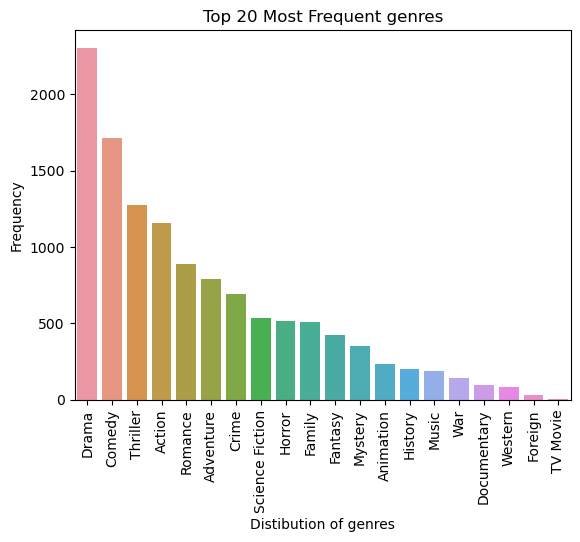

In [26]:
# Plot distribution of genres
Distribution_plot('genres')

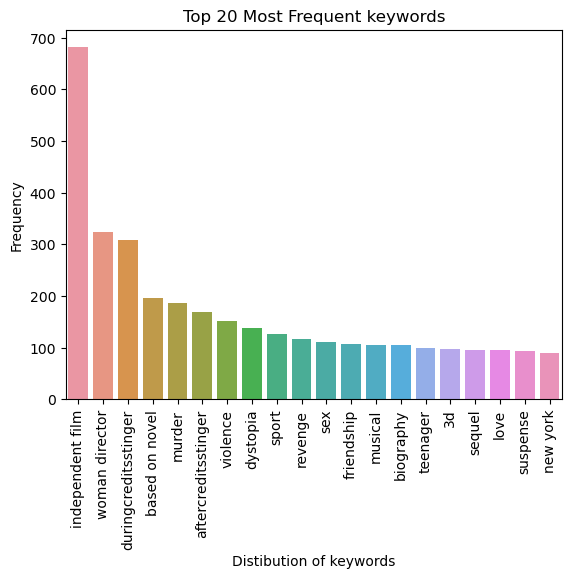

In [27]:
# Plot distribution of keywords
Distribution_plot('keywords')

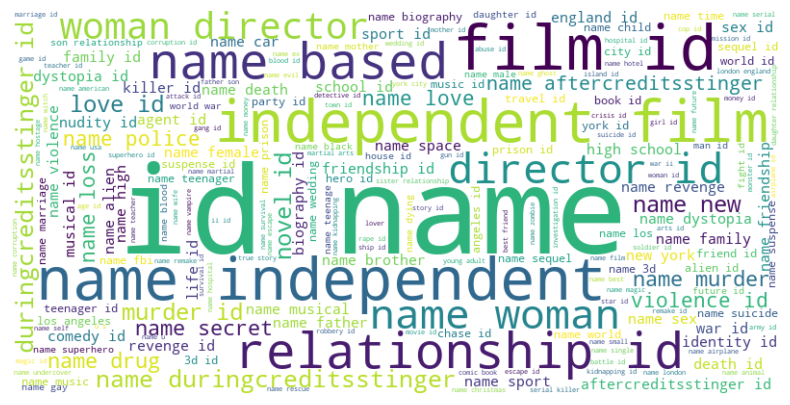

In [28]:
df_name = pd.DataFrame(json.loads('[' + ','.join(df['keywords']) + ']'))
df_name = df_name.stack()
df_name = pd.json_normalize(df_name)

# Concatenate all keywords into a single string
text = ' '.join(df['keywords'].dropna())

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


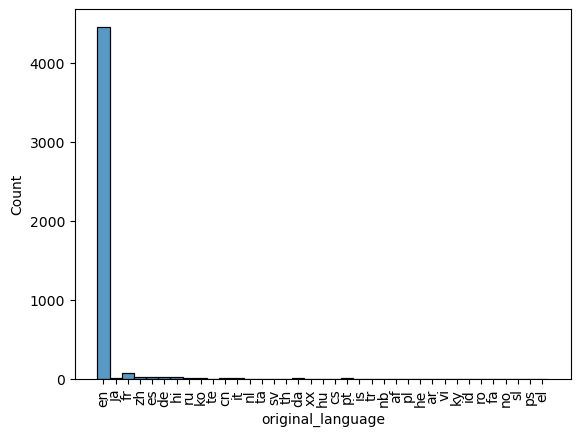

In [29]:
# Plot distribution of original languages
ax = sns.histplot(df['original_language'])
ax.tick_params(axis='x', rotation=90)
plt.show()

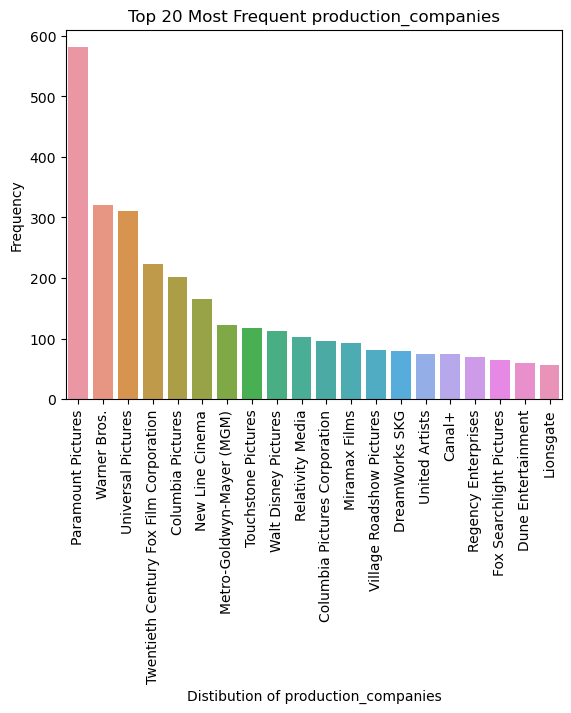

In [30]:
# Plot distribution of production companies
Distribution_plot('production_companies')

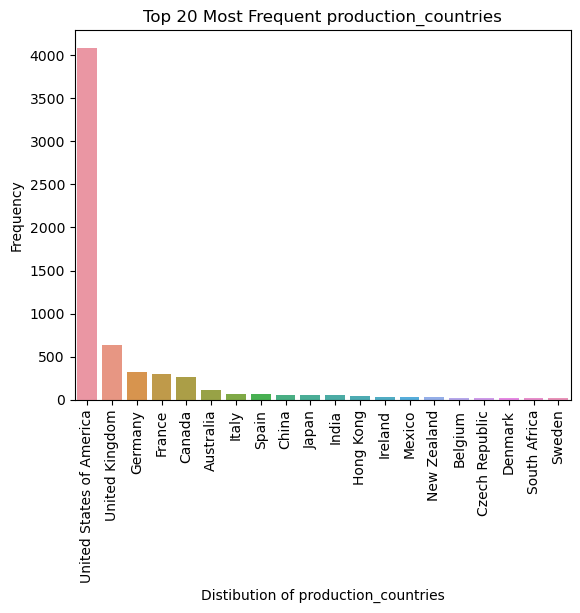

In [31]:
# Plot distribution of production countries
Distribution_plot('production_countries')

C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  func(*args, **kwargs)
C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  func(*args, **kwargs)
C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  func(*args, **kwargs)
C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
C:\Users\pcsarv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35486 (\N{

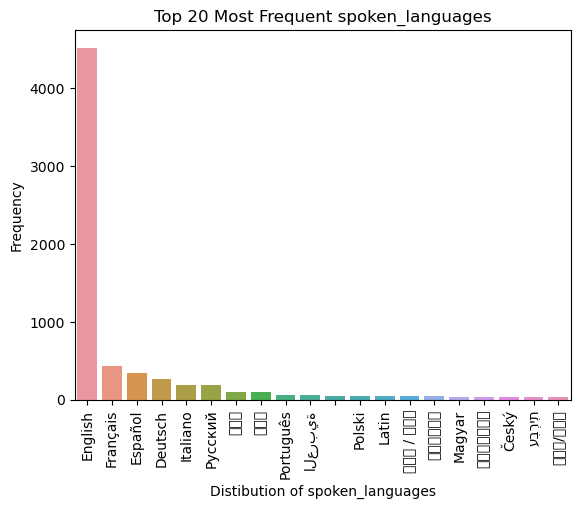

In [32]:
# Plot distribution of spoken languages
Distribution_plot('spoken_languages')

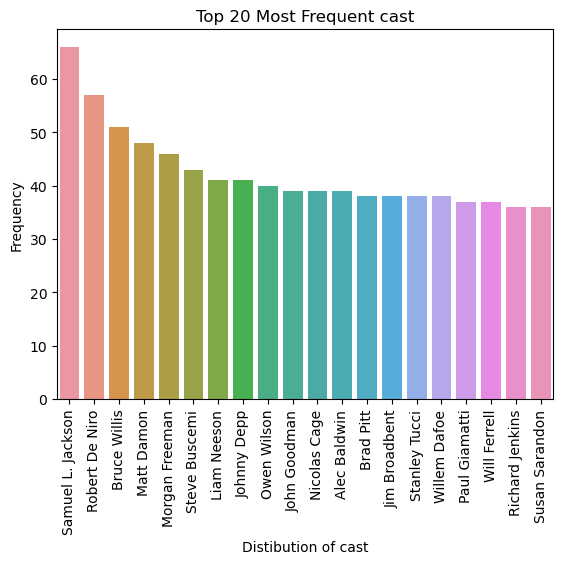

In [33]:
# Plot distribution of casts
Distribution_plot('cast')

Text(0.5, 1.0, 'Top 20 Most Frequent directors')

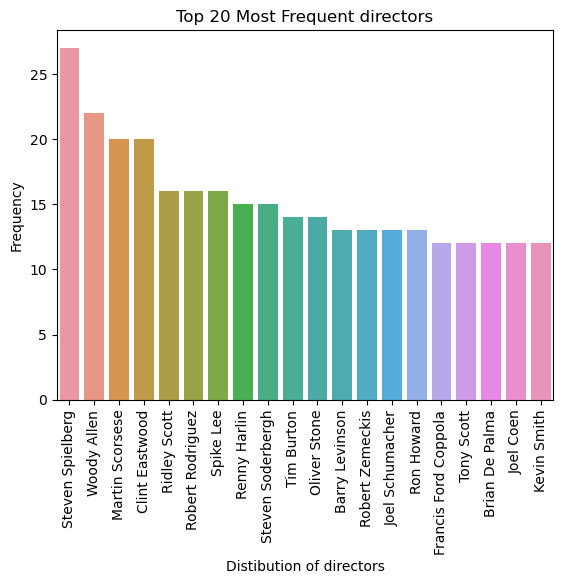

In [34]:
# Plot distribution of directors (means crews)
df_name = pd.DataFrame(json.loads('[' + ','.join(df['crew']) + ']'))
df_name = df_name.stack()
df_name = pd.json_normalize(df_name)

df_director = df_name[df_name['job'] == 'Director']

# Count the frequency of each director
id_counts = df_director['name'].value_counts().nlargest(20)  # Count and select the top 20 most frequent directors

ax = sns.barplot(df_name, x=id_counts.index, y=id_counts.values)
ax.tick_params(axis='x', rotation=90)
plt.xlabel('Distibution of directors')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent directors')

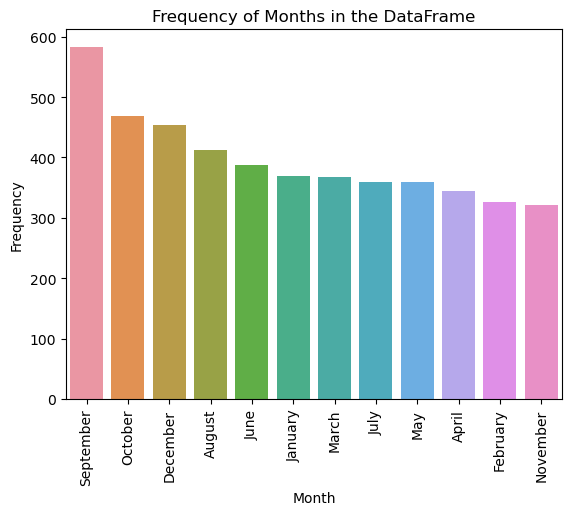

In [35]:
# Extract the month from the 'date' column
df['month'] = pd.to_datetime(df['release_date']).dt.month_name()

# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Count the frequency of each month
month_counts = df['month'].value_counts()

# Create a histogram plot
#plt.bar(month_counts.index, month_counts.values)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Months in the DataFrame')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Step 6.1.2: Numerical varaible analysis

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def Distribution_plot_num(name):
    """
    Plots a combined bar chart and box plot for the distribution of a numerical variable.

    Args:
        name (str): The name of the numerical variable to plot.
    """

    # Count the frequency of each director
    id_counts = df[name].nlargest(20)  # Count and select the top 20 most frequent directors

    # Create a subplot figure for combined plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))  # Adjust figsize for readability

    # Bar plot on the first axis
    ax1 = sns.barplot(ax=ax1, x=df['original_title'].values[id_counts.index], y=id_counts.values)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel('Distibution of ' + f'{name}')
    ax1.set_ylabel('Amount')
    ax1.set_title('Top 20 Movies With The Most ' + f'{name}')

    # Box plot on the second axis
    ax2 = sns.boxplot(ax=ax2, data=id_counts.values, showmeans=True)
    ax2.set_title('Box Plot of ' + f'{name} Distribution (Top 20)')

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

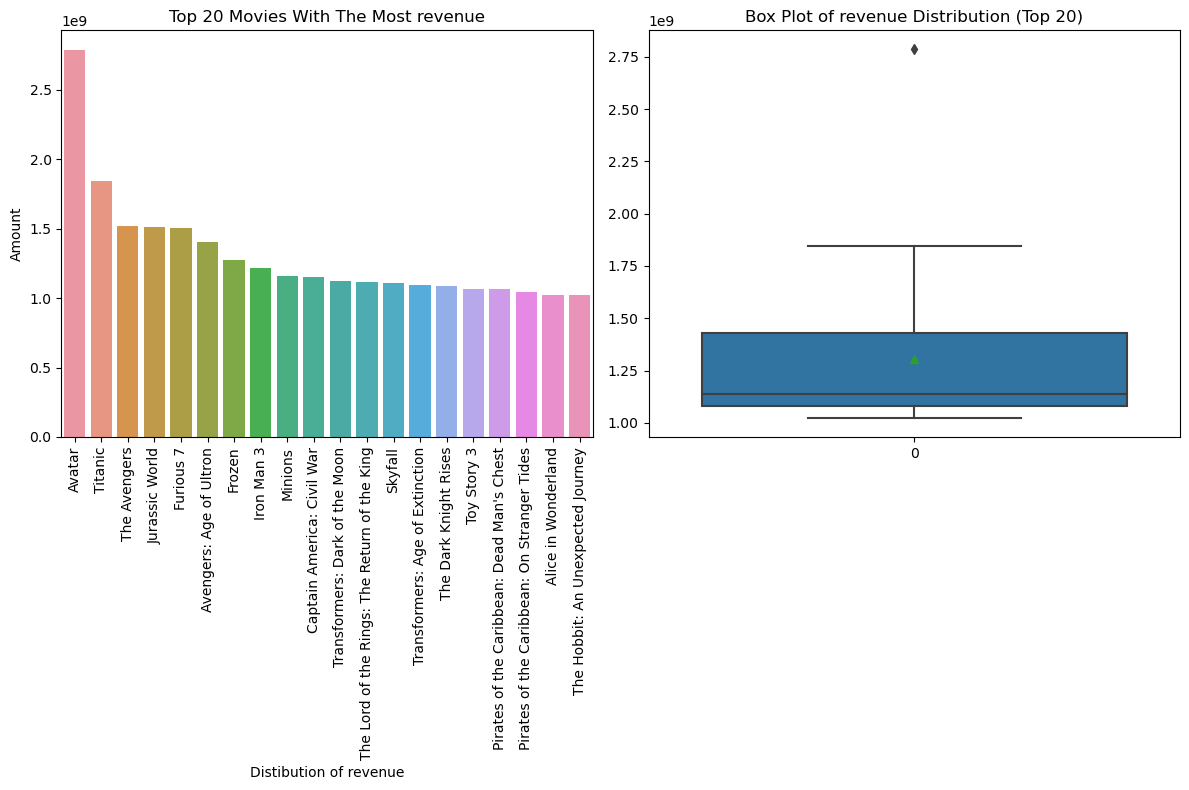

In [37]:
Distribution_plot_num ('revenue')

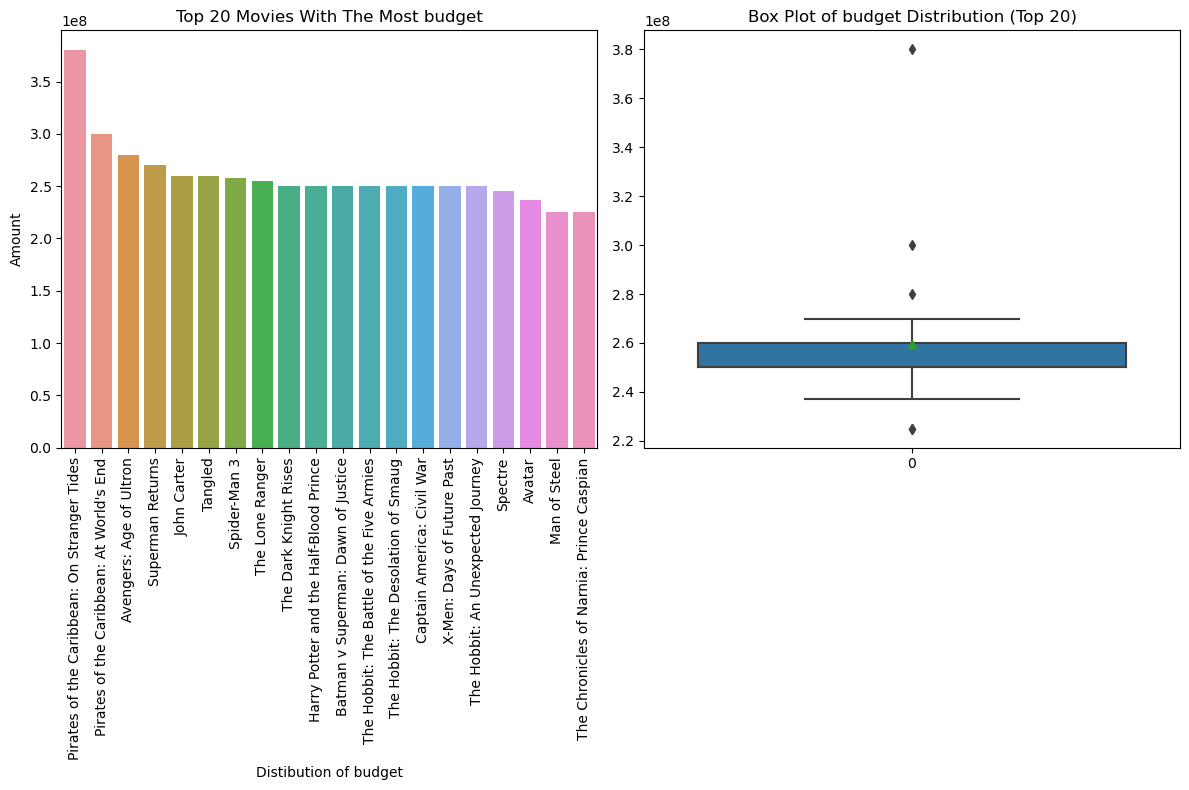

In [38]:
Distribution_plot_num ('budget')

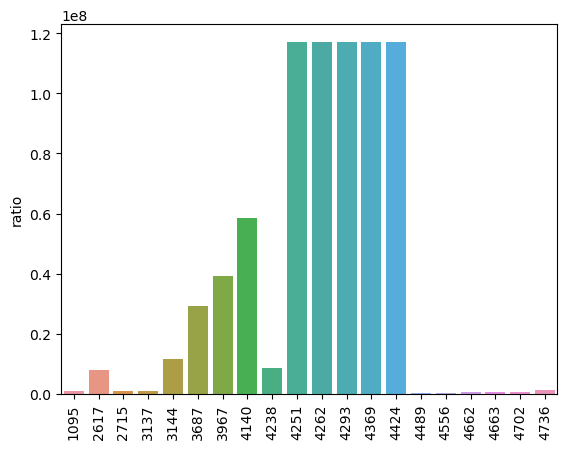

In [39]:
# Calculate the revenue/budget ratio
df['ratio'] = df['revenue'] / df['budget']

# Sort the DataFrame by the ratio in descending order and select the top 20 rows
top_20_df = df.sort_values(by='ratio', ascending=False).head(20)

# Create a bar chart using seaborn
sns.barplot(data=top_20_df, x=top_20_df.index, y='ratio')
plt.xticks(rotation=90)
plt.show()

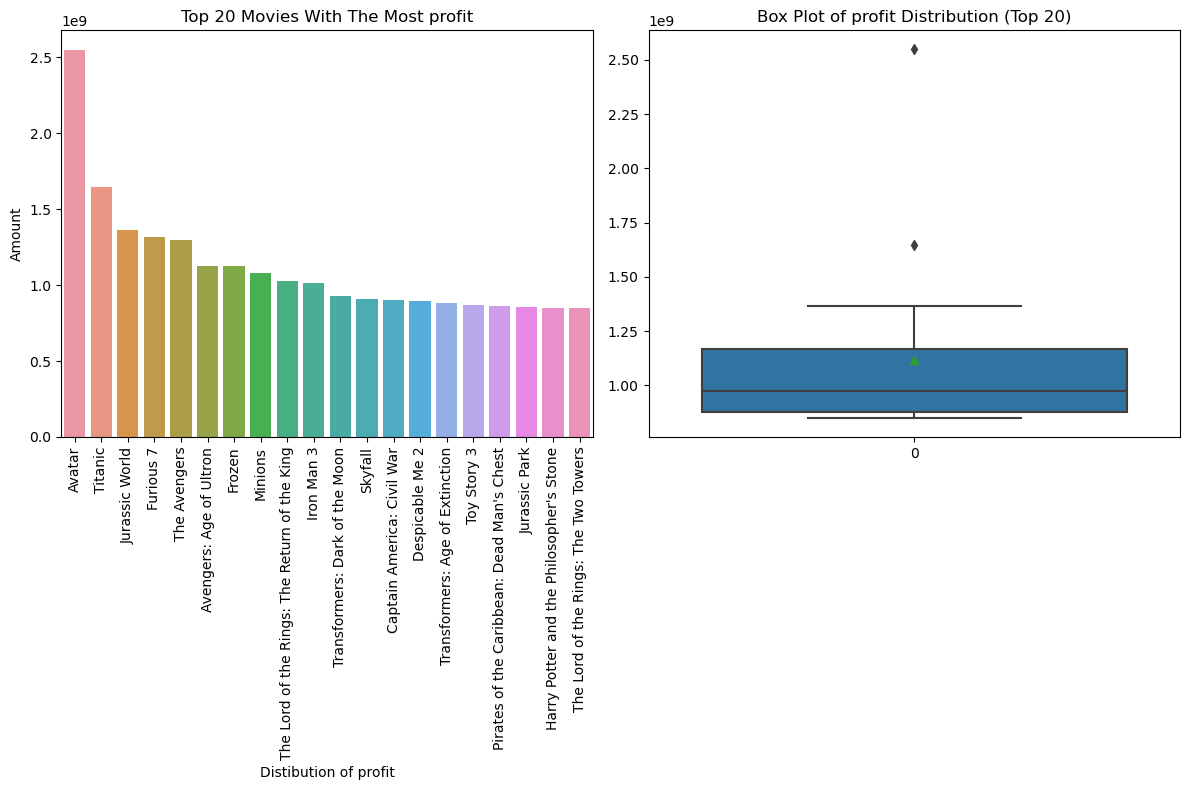

In [40]:
# Calculate profit
df['profit'] = df['revenue'] - df['budget']
Distribution_plot_num ('profit')

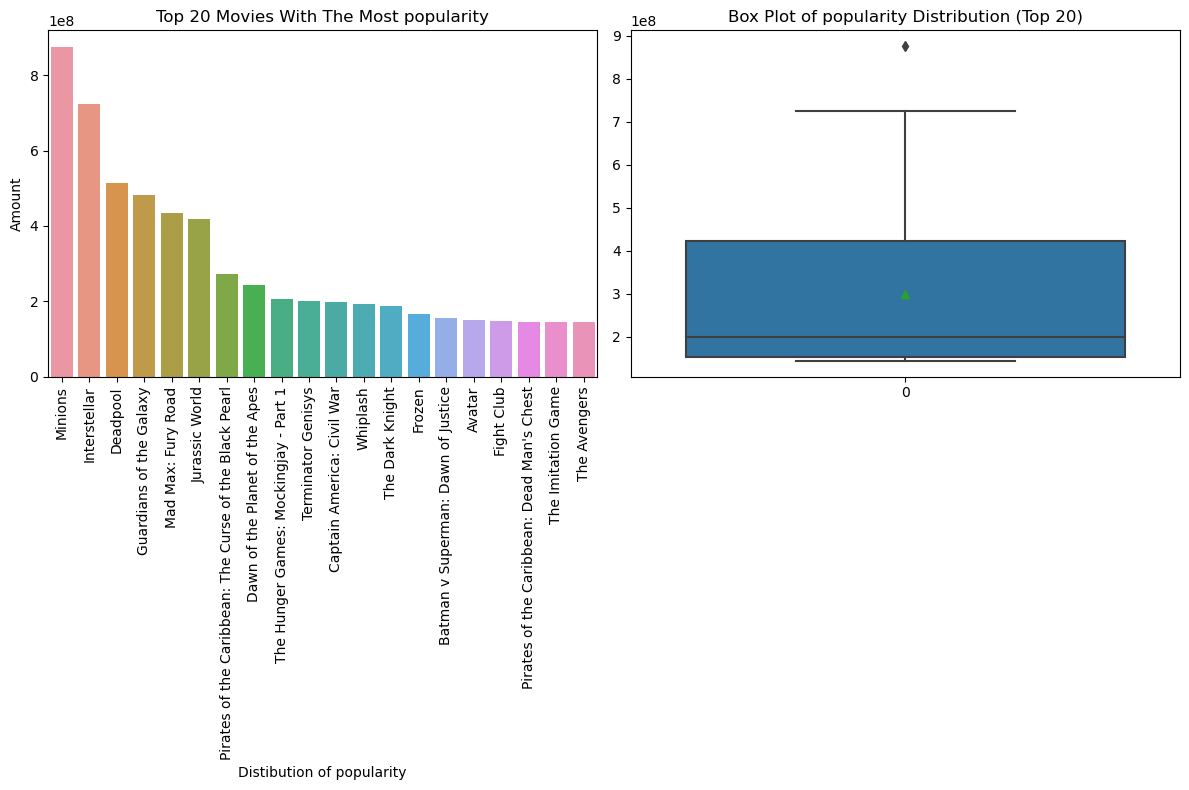

In [41]:
# Delete the dot in popularity column
df['popularity'] = df['popularity'].apply(lambda x: int(str(x).replace('.', '')))
Distribution_plot_num ('popularity')

C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  plt.tight_layout()
C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  plt.tight_layout()
C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 23563 (\N{CJK UNIFIED IDEOGRAPH-5C0B}) missing from current font.
  plt.tight_layout()
C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  plt.tight_layout()
C:\Users\pcsarv\AppData\Local\Temp\ipykernel_8804\3213381036.py:30: UserWarning: Glyph 38560 (\N{CJK UNIFIED IDEOGRAPH-96A0}) missing from current

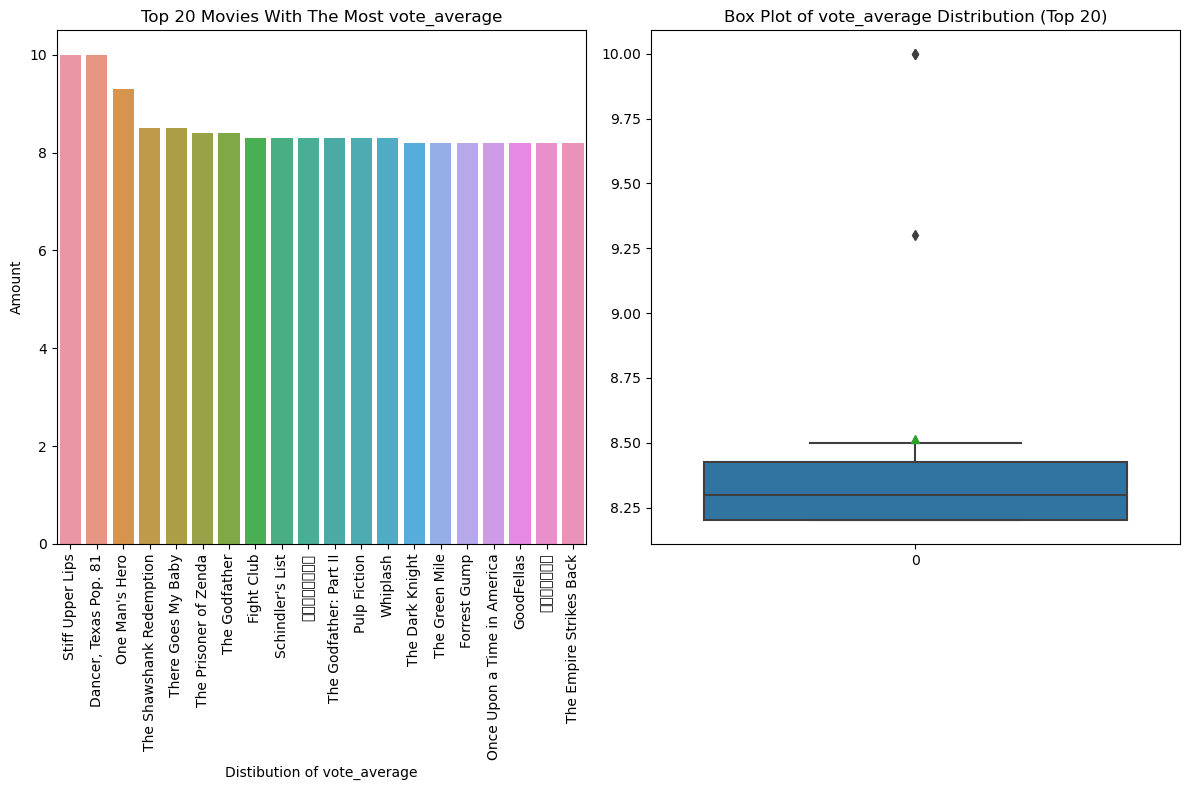

In [42]:
Distribution_plot_num ('vote_average')

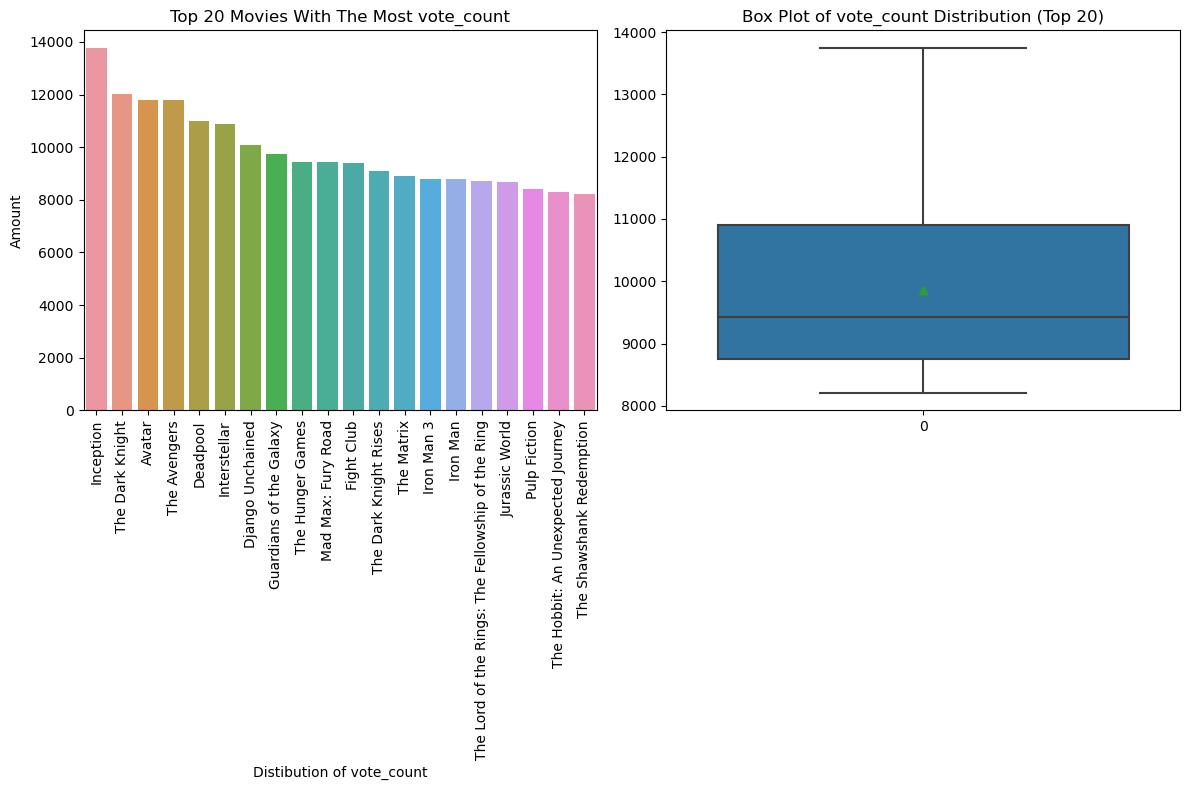

In [43]:
Distribution_plot_num ('vote_count')

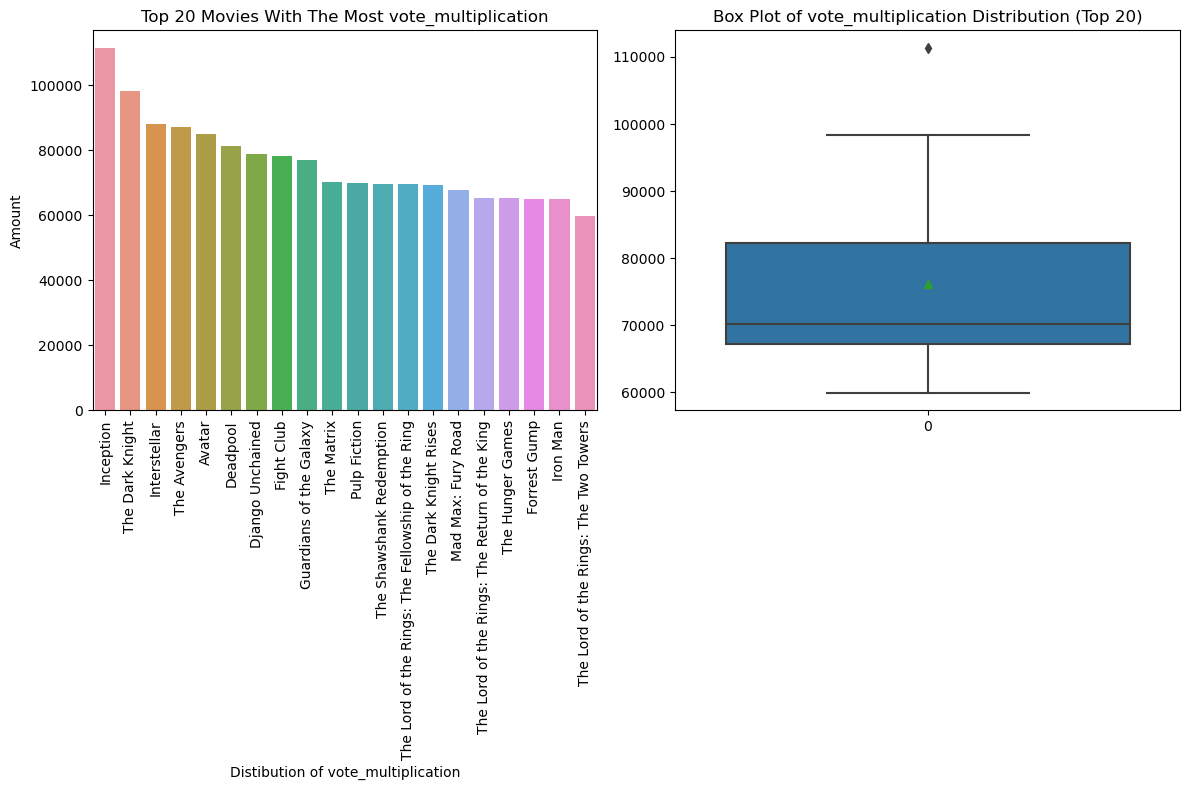

In [44]:
df['vote_multiplication'] = df['vote_average'] * df['vote_count']
Distribution_plot_num ('vote_multiplication')

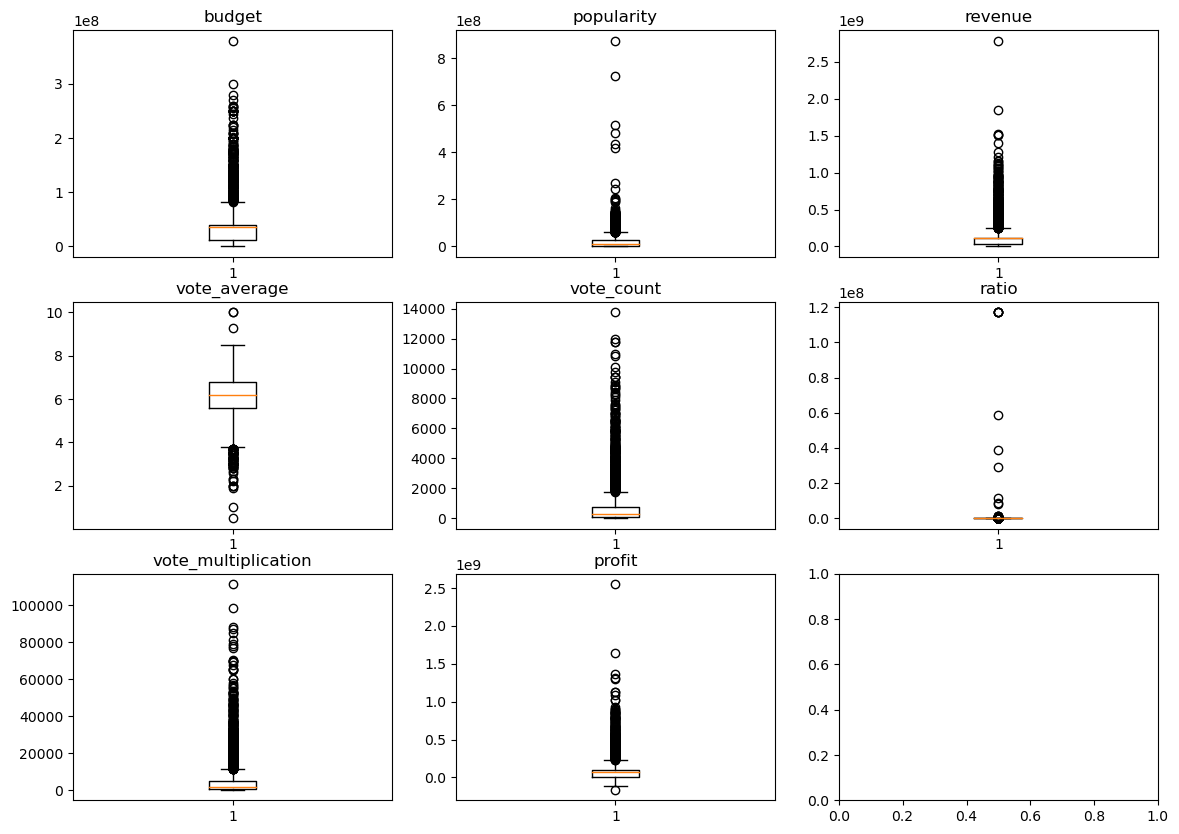

In [45]:
numerical_columns_new = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count','ratio','vote_multiplication','profit']
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes_flat = axes.flatten()

for i, col in enumerate(numerical_columns_new):
        ax = axes_flat[i]
        ax.boxplot(df[col])
        ax.set_title(col)

## Step 6.2: Two variables analysis 

### Step 6.2.1: Numerical variables

### Heat Map:

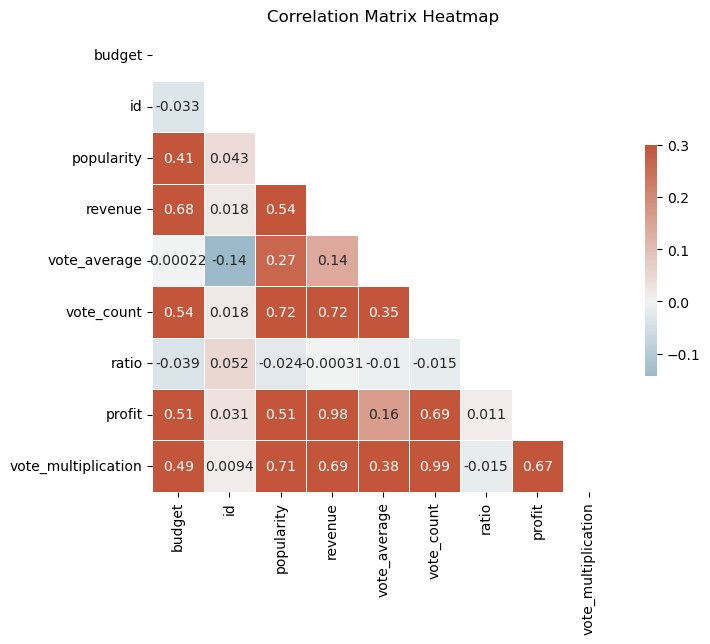

In [46]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

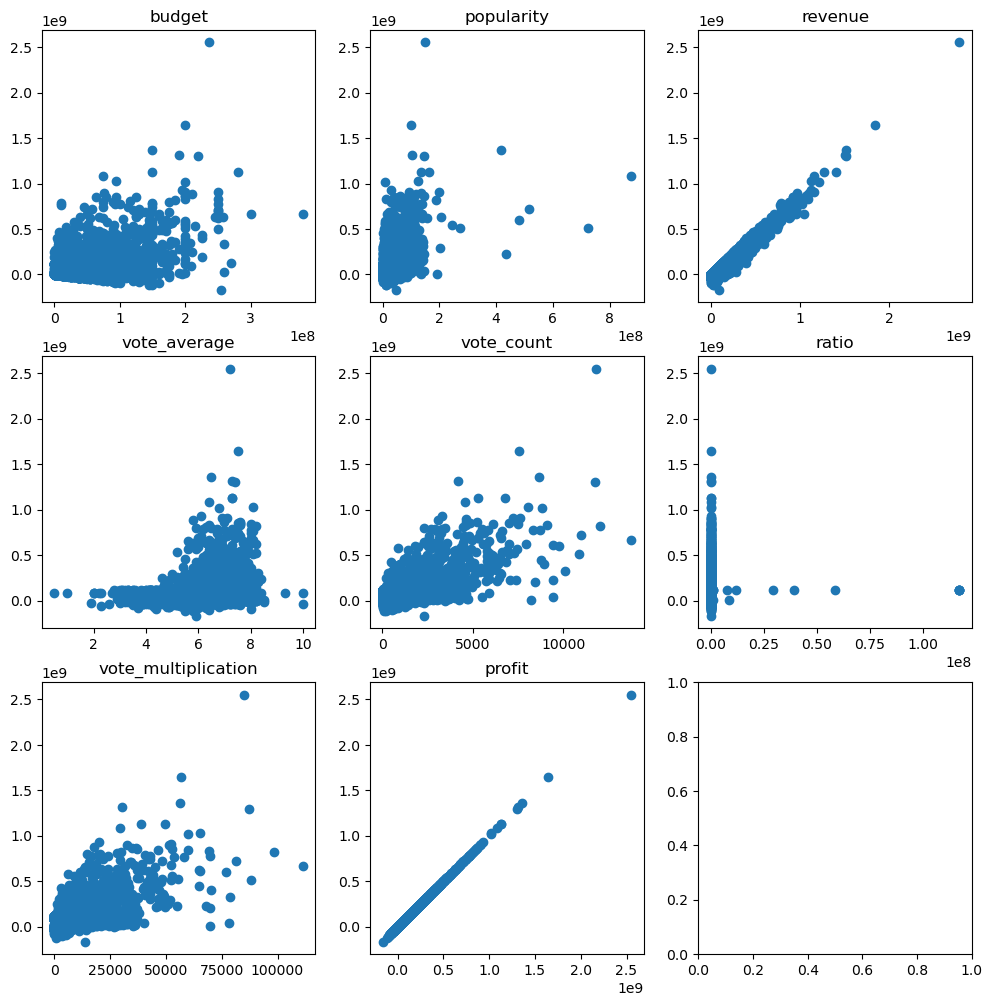

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(numerical_columns_new):
    ax = axes_flat[i]
    ax.scatter(df[col], df.profit)
    ax.set_title(col)

Count of non profitable movies: 911


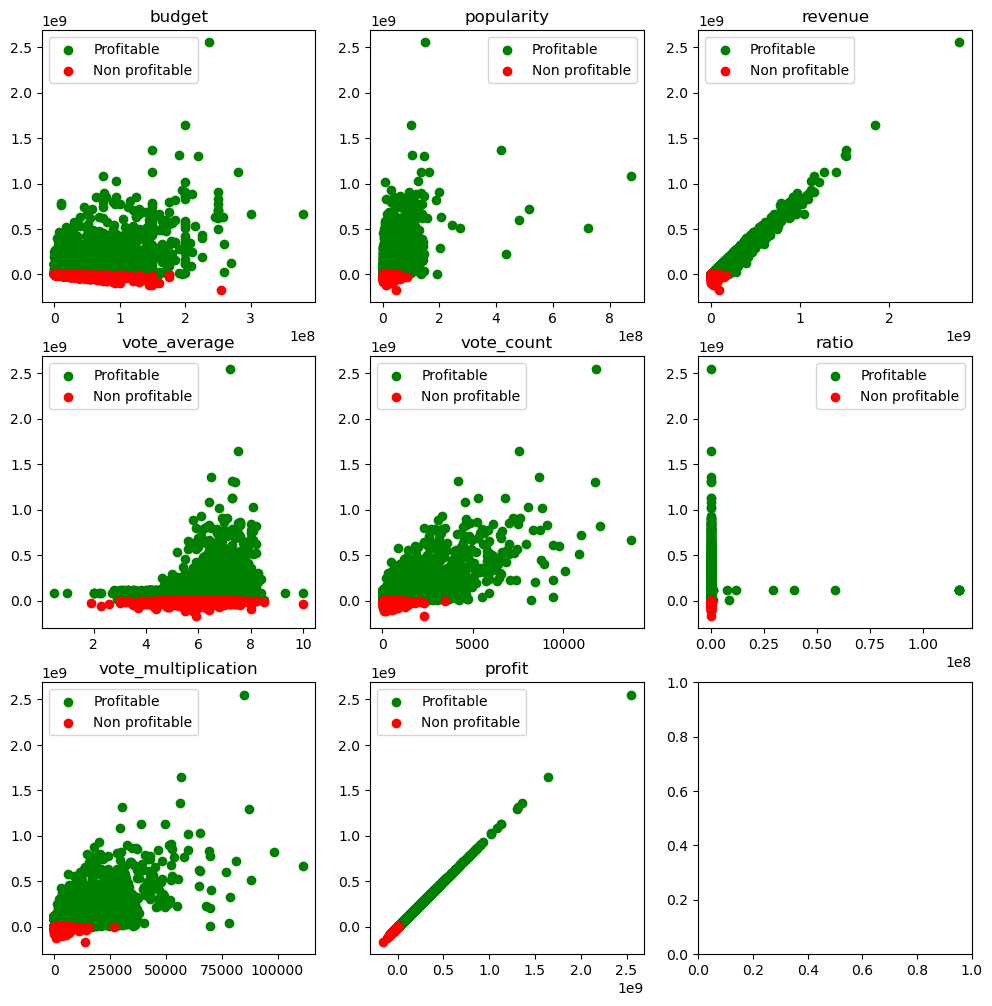

In [48]:
flags = df['profit'] > 0

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(numerical_columns_new):
    ax = axes_flat[i]
    ax.scatter(df[col][flags], df.profit[flags], c='g', label='Profitable')
    ax.scatter(df[col][~flags], df.profit[~flags], c='r', label='Non profitable')
    ax.set_title(col)
    ax.legend()

# Count of non profitable movies 
print('Count of non profitable movies:',df[~flags].count()[0])

### Step 6.2.2: Categorical - Numerical variables

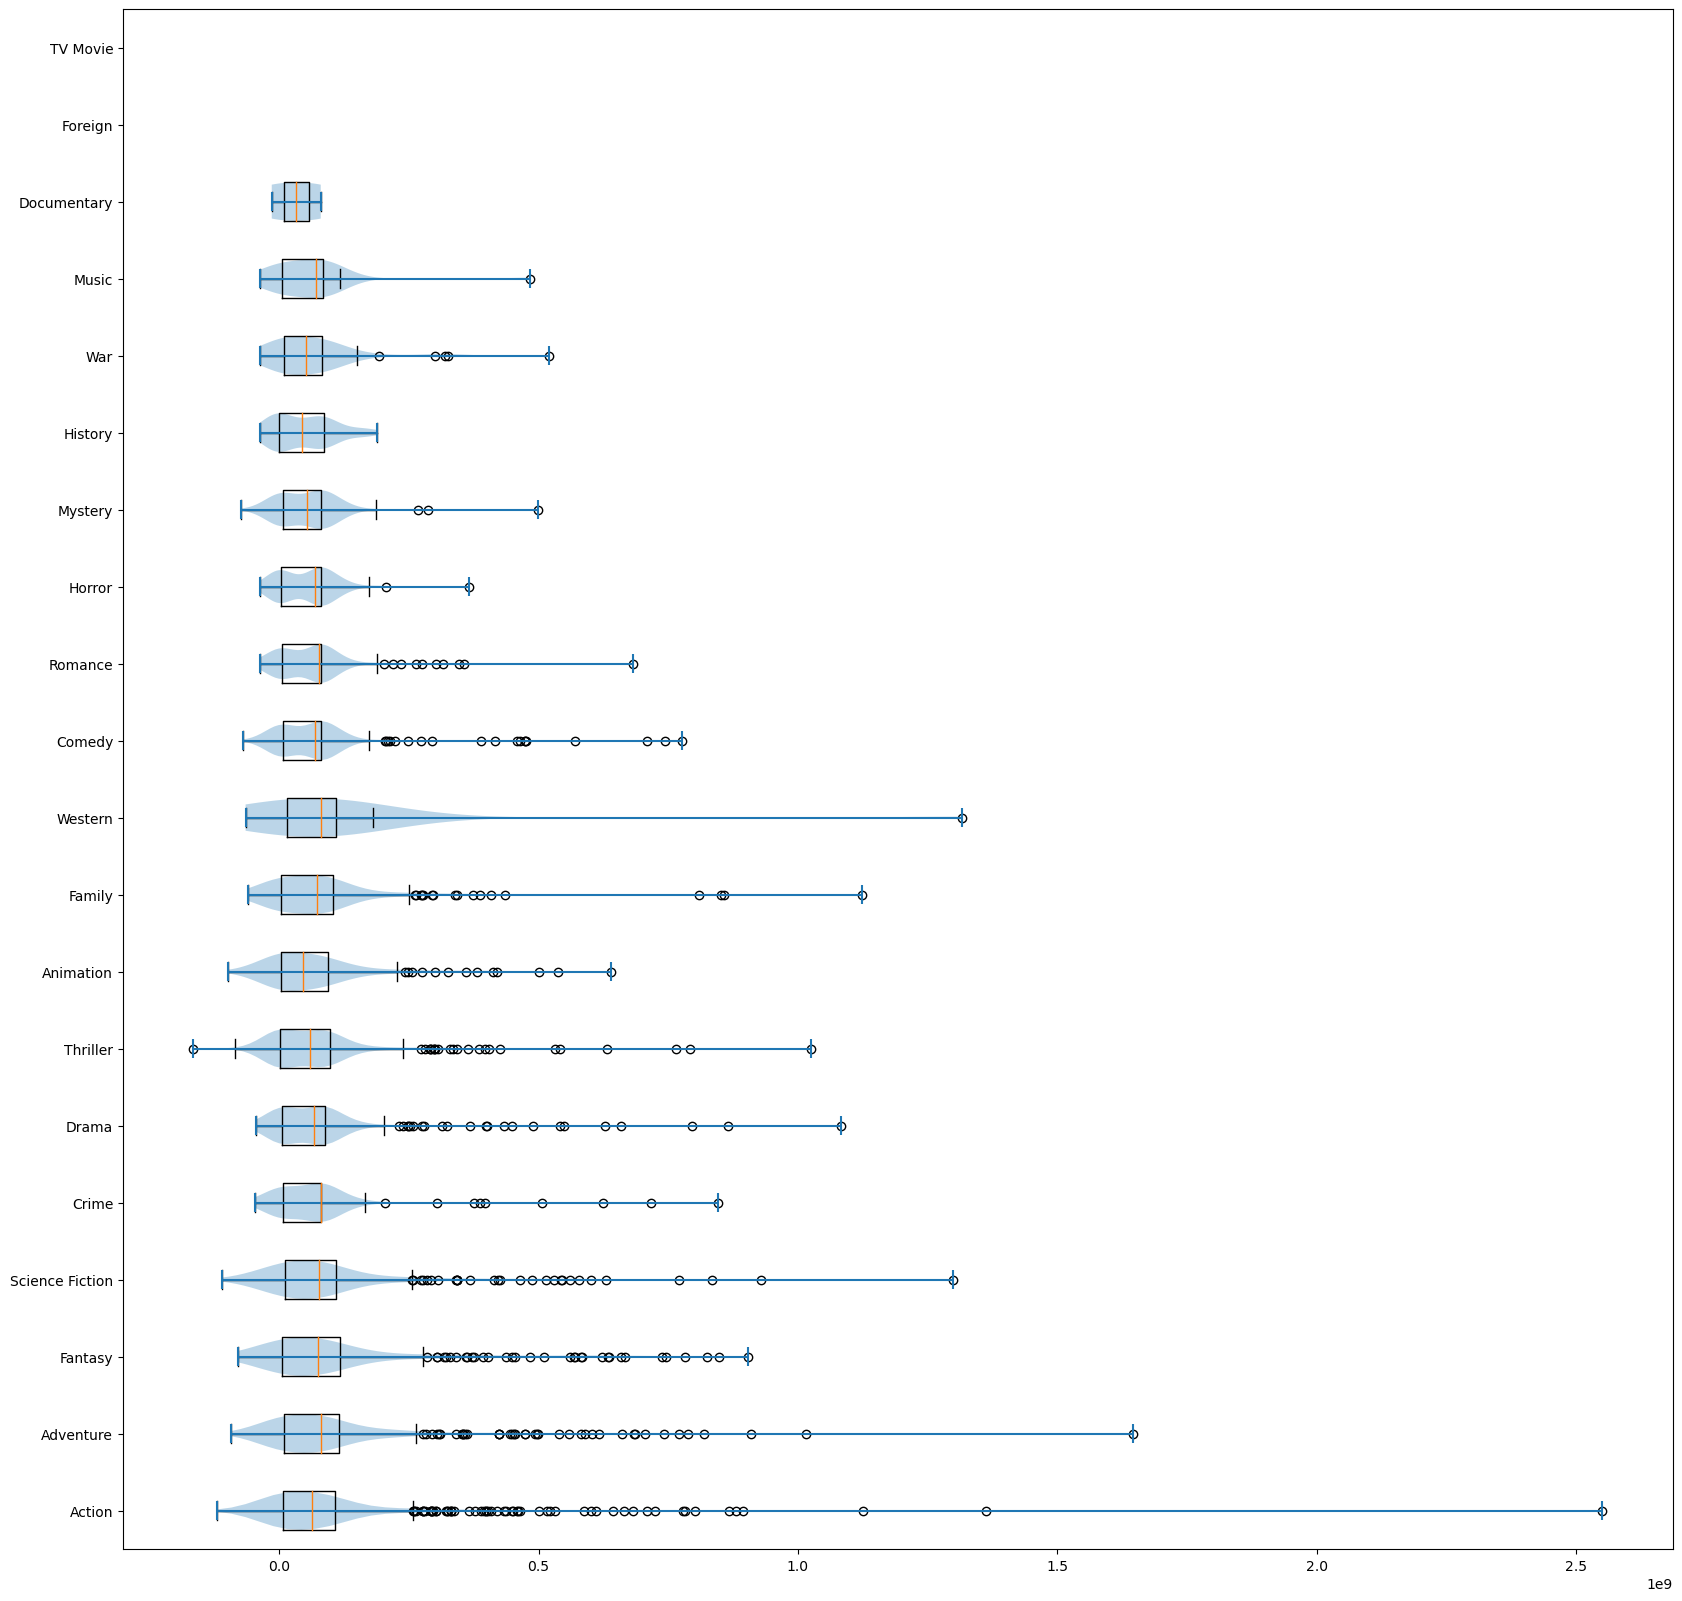

In [49]:
plt.figure(figsize=(20,20))

df_genres = pd.DataFrame(json.loads('[' + ','.join(df['genres']) + ']'))
df_genres = df_genres.stack()
df_genres = pd.json_normalize(df_genres)

# Get a dictionary mapping IDs to names
id_to_name = dict(zip(df_genres['id'], df_genres['name']))

col = 'id'
box_data = [df.profit[df_genres[col] == var] for var in df_genres[col].unique()]
box_labels = [id_to_name[var] for var in df_genres[col].unique()]  # Map IDs to names

plt.boxplot(box_data, labels=box_labels, vert=False);
plt.violinplot(box_data[:-2], vert=False);

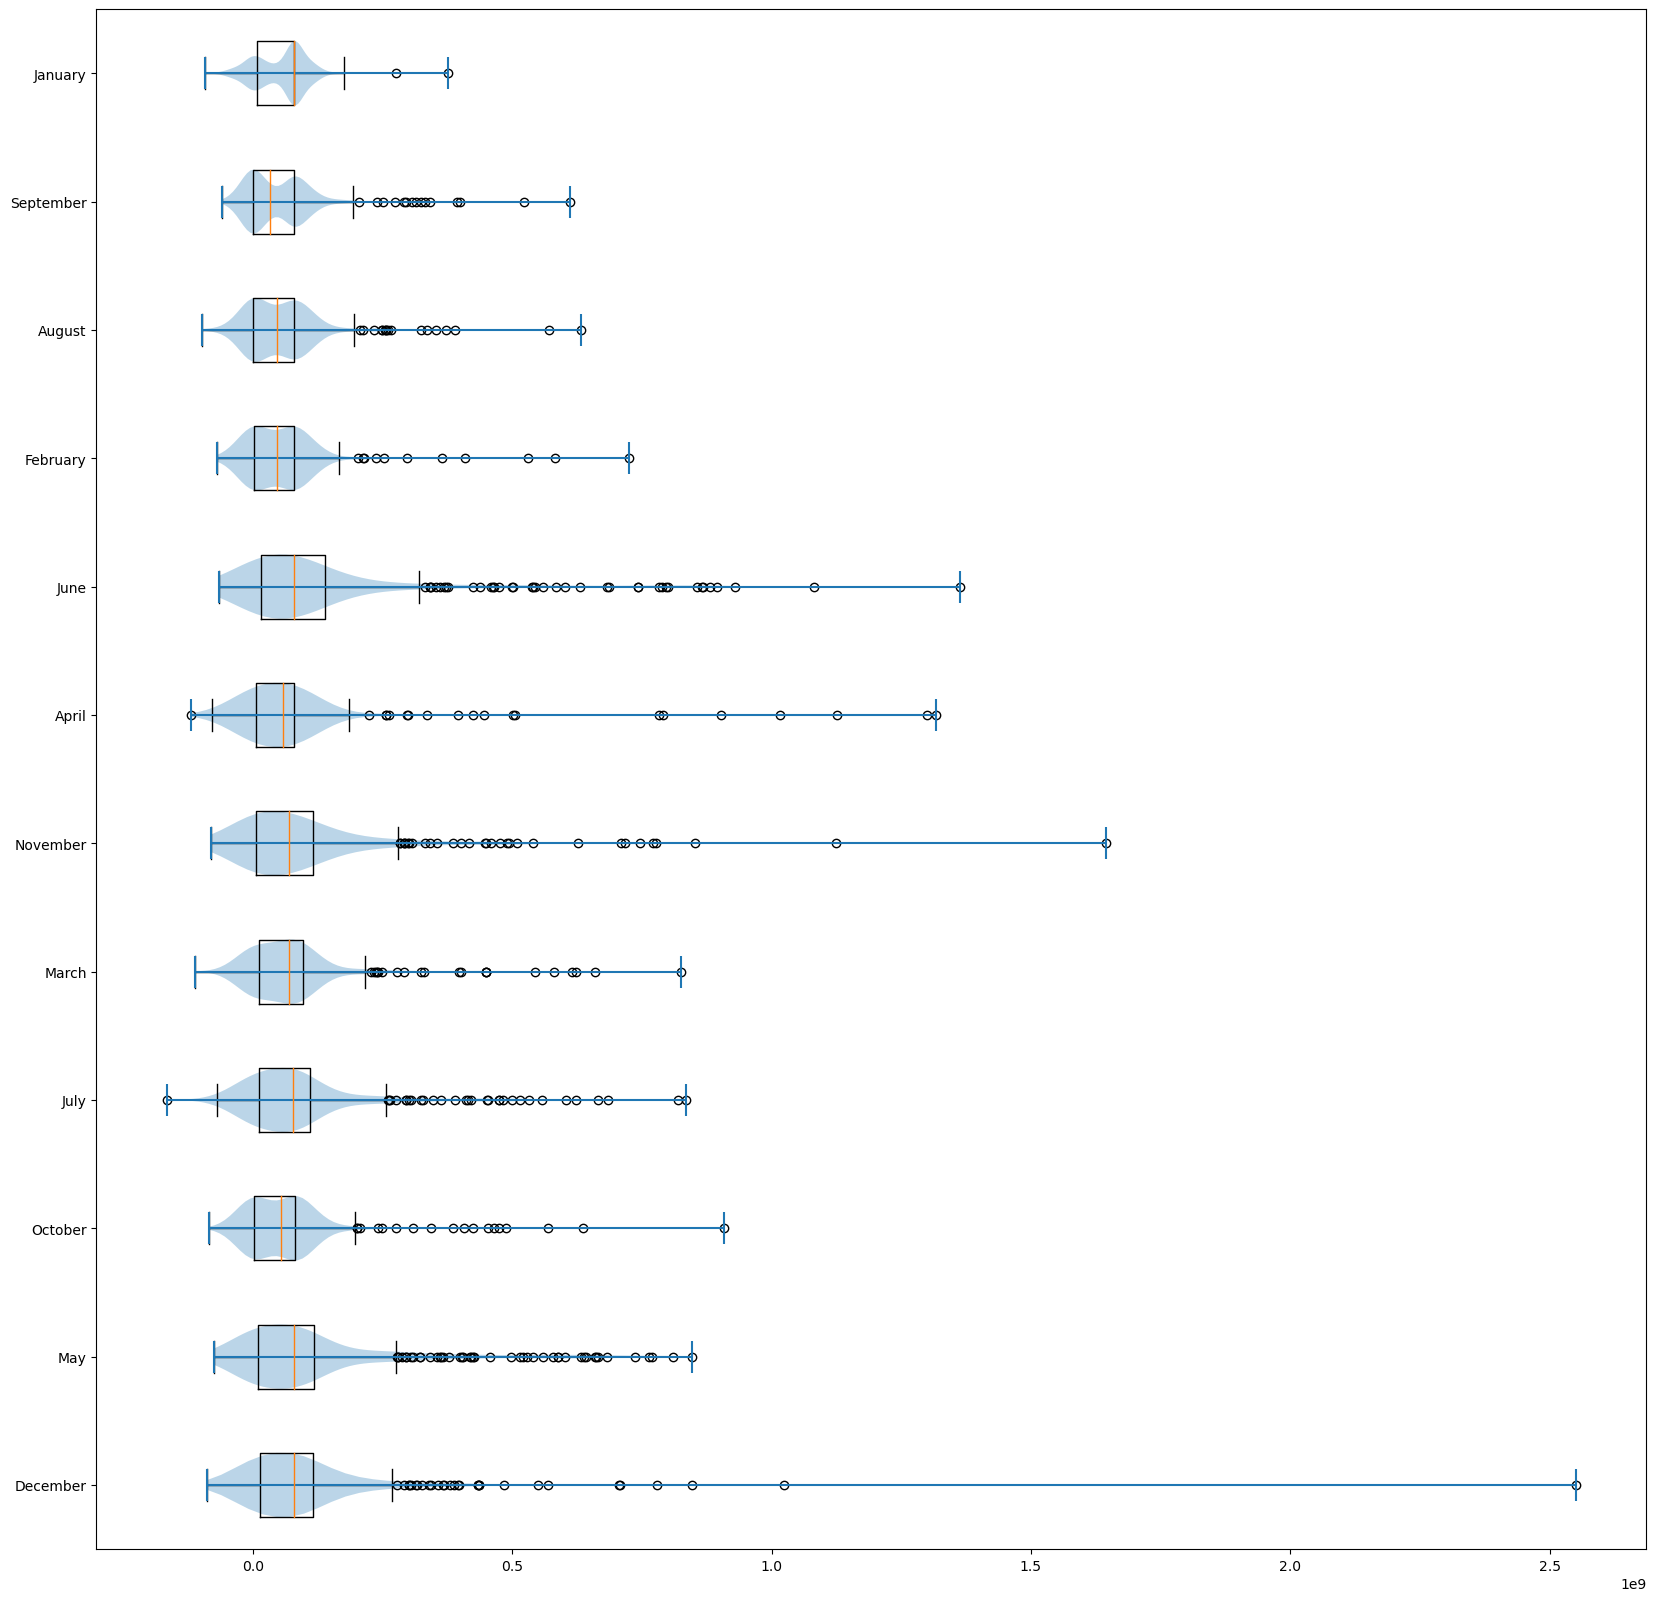

In [50]:
plt.figure(figsize=(20,20))

col = 'month'
plt.boxplot([df.profit[df[col] == var] for var in df[col].unique()], labels=df[col].unique(), vert=False);
plt.violinplot([df.profit[df[col] == var] for var in df[col].unique()], vert=False);

### Step 6.2.3: Categorical variables

In [51]:
# def cramers_v(x, y):
#     """
#     This function calculates Cramer's V between two categorical variables.

#     Args:
#       x: The first categorical variable.
#       y: The second categorical variable.

#     Returns:
#       The Cramer's V coefficient between x and y.
#     """
#     confusion_matrix = pd.crosstab(x, y)
#     chi2, p, deg_of_freedom, expected = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     min_dim = min(confusion_matrix.shape) - 1
#     return np.sqrt((chi2 / (n * min_dim)))

# def cramer_v_correlation(df):
#     """
#     This function calculates Cramer's V correlation matrix for all pairs of categorical columns in a DataFrame.

#     Args:
#       df: The DataFrame containing categorical variables.

#     Returns:
#       A DataFrame containing Cramer's V correlation coefficients between each pair of columns.
#     """
#     categorical_cols = [col for col in df.columns if df[col].dtypes == 'object']
#     # Convert string columns to categorical type
#     for col in categorical_cols:
#         df[col] = df[col].astype('category')
#     correlation_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
#     for col1 in categorical_cols:
#         for col2 in categorical_cols:
#             if col1 != col2:
#                 correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
#     return correlation_matrix

In [52]:
# correlation_matrix = cramer_v_correlation(df)
# print(correlation_matrix)

## Step 6.3: Multi-variables analysis

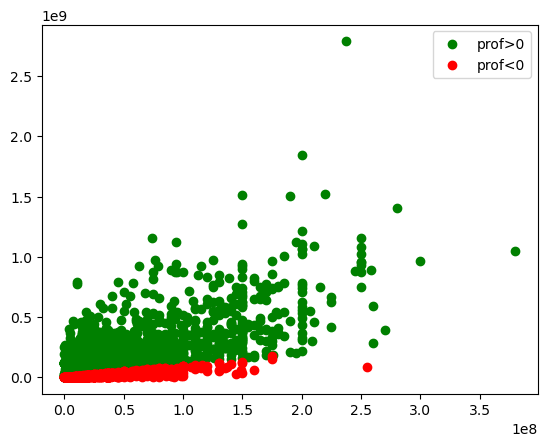

In [53]:
flag = df['profit'] > 0

plt.scatter(df.budget[flag], df.revenue[flag], c='g', label='prof>0')
plt.scatter(df.budget[~flag], df.revenue[~flag], c='r', label='prof<0')
plt.legend()

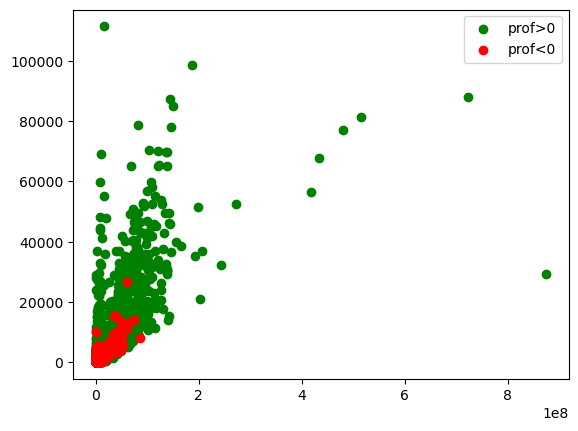

In [54]:
flag = df['profit'] > 0

plt.scatter(df.popularity[flag], df.vote_multiplication[flag], c='g', label='prof>0')
plt.scatter(df.popularity[~flag], df.vote_multiplication[~flag], c='r', label='prof<0')
plt.legend()

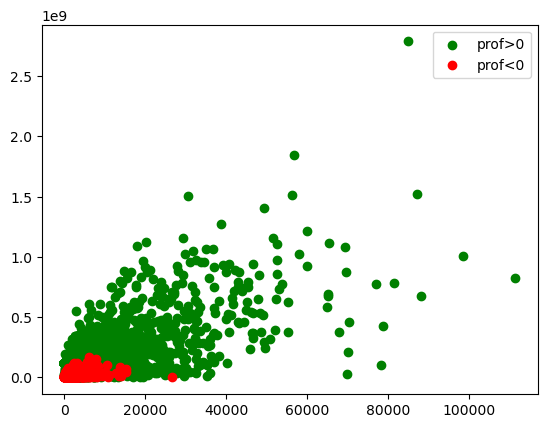

In [55]:
flag = df['profit'] > 0

plt.scatter(df.vote_multiplication[flag], df.revenue[flag], c='g', label='prof>0')
plt.scatter(df.vote_multiplication[~flag], df.revenue[~flag], c='r', label='prof<0')
plt.legend()

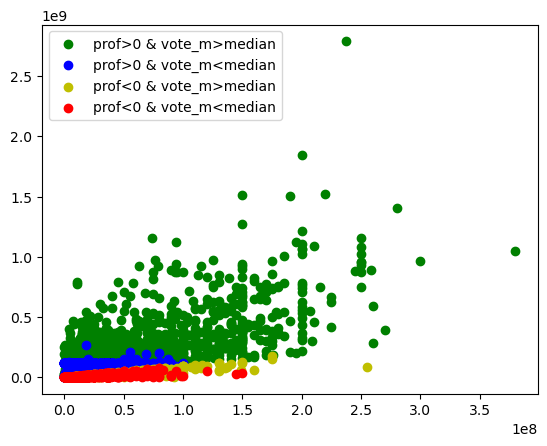

In [56]:
flag1 = df['profit'] > 0
flag2 = df['vote_multiplication'] > df['vote_multiplication'].median()

plt.scatter(df.budget[flag1 & flag2], df.revenue[flag1 & flag2], c='g', label='prof>0 & vote_m>median')
plt.scatter(df.budget[flag1 & ~flag2], df.revenue[flag1 & ~flag2], c='b', label='prof>0 & vote_m<median')
plt.scatter(df.budget[~flag1 & flag2], df.revenue[~flag1 & flag2], c='y', label='prof<0 & vote_m>median')
plt.scatter(df.budget[~flag1 & ~flag2], df.revenue[~flag1 & ~flag2], c='r', label='prof<0 & vote_m<median')
plt.legend()

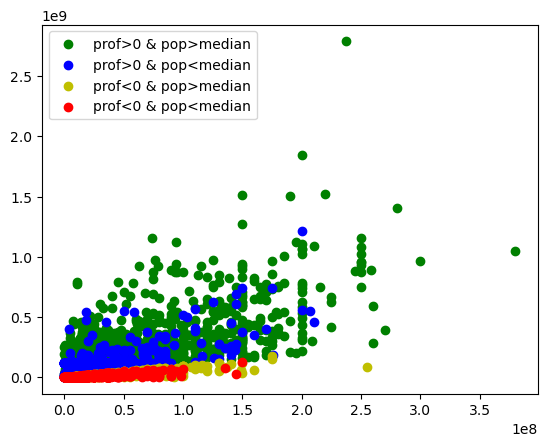

In [57]:
flag1 = df['profit'] > 0
flag2 = df['popularity'] > df['popularity'].median()

plt.scatter(df.budget[flag1 & flag2], df.revenue[flag1 & flag2], c='g', label='prof>0 & pop>median')
plt.scatter(df.budget[flag1 & ~flag2], df.revenue[flag1 & ~flag2], c='b', label='prof>0 & pop<median')
plt.scatter(df.budget[~flag1 & flag2], df.revenue[~flag1 & flag2], c='y', label='prof<0 & pop>median')
plt.scatter(df.budget[~flag1 & ~flag2], df.revenue[~flag1 & ~flag2], c='r', label='prof<0 & pop<median')
plt.legend()

## Step 7: Building Models

In [76]:
df['profitable'] = df['profit'] > 0

#### We should exclude features related to the movie's revenue in order to predict profitability.

In [77]:
X_colunms = df.select_dtypes(include=["int64", "float64"]).drop(['id', 'profit','revenue','ratio'], axis=1).columns
print(X_colunms)

Index(['budget', 'popularity', 'vote_average', 'vote_count',
       'vote_multiplication'],
      dtype='object')


In [78]:
# Split the data into X and y
X = df[X_colunms]
y = df["profitable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
def analyze_model(model, X_train, y_train, X_test, y_test):
    """
    Analyzes a model's performance and generates ROC curve data.

    Args:
        model: The machine learning model to be analyzed.
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        X_test (ndarray): Testing features.
        y_test (ndarray): Testing labels.

    Returns:
        tuple: A tuple containing the following elements:
            - accuracy (float): Model accuracy on the testing set.
            - precision (float): Model precision on the testing set.
            - recall (float): Model recall on the testing set.
            - f1 (float): Model F1-score on the testing set.
            - roc_auc (float): Area Under the ROC Curve (AUC) score.
            - fpr (ndarray): False Positive Rate for ROC curve.
            - tpr (ndarray): True Positive Rate for ROC curve.
    """

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming binary classification

    # Calculate performance metrics
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    # Calculate ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = round(roc_auc_score(y_test, y_pred_proba), 3)

    return (accuracy, precision, recall, f1, roc_auc, fpr, tpr)

C:\Users\pcsarv\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


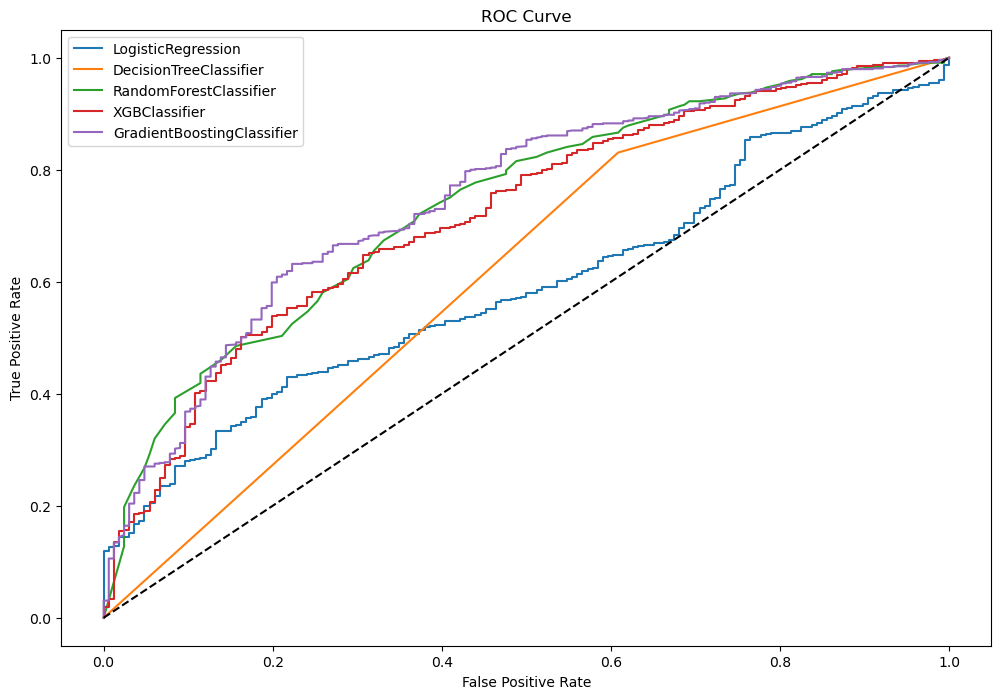

                        Model  Accuracy  Precision  Recall     F1  ROC AUC
4  GradientBoostingClassifier     0.828      0.841   0.976  0.903    0.749
2      RandomForestClassifier     0.814      0.856   0.931  0.892    0.738
3               XGBClassifier     0.804      0.854   0.921  0.886    0.720
1      DecisionTreeClassifier     0.754      0.866   0.831  0.848    0.611
0          LogisticRegression     0.825      0.825   1.000  0.904    0.592


In [80]:
# Test different models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(use_label_encoder=False),
    GradientBoostingClassifier(random_state=42),
]

analyzes = []
plt.figure(figsize=(12, 8))
for model in models:
    accuracy, precision, recall, f1, roc_auc, fpr, tpr = analyze_model(model, X_train, y_train, X_test, y_test)
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    analyzes.append({
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
    })

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print the results in a table
results = pd.DataFrame(analyzes).sort_values(by="ROC AUC", ascending=False)
print(results)

In [81]:
results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
4,GradientBoostingClassifier,0.828,0.841,0.976,0.903,0.749
2,RandomForestClassifier,0.814,0.856,0.931,0.892,0.738
3,XGBClassifier,0.804,0.854,0.921,0.886,0.720
1,DecisionTreeClassifier,0.754,0.866,0.831,0.848,0.611
0,LogisticRegression,0.825,0.825,1.000,0.904,0.592
